<a href="https://colab.research.google.com/github/karimqasim/MachineLearning/blob/master/Cifar10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

import matplotlib.pyplot as plt

from keras.callbacks import EarlyStopping
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam
from keras.layers.pooling import MaxPooling2D
from keras.utils import to_categorical

Using TensorFlow backend.


In [3]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
y_train_cat = to_categorical(Y_train)
y_test_cat = to_categorical(Y_test)
X_train.shape, y_test_cat.shape


((50000, 32, 32, 3), (10000, 10))

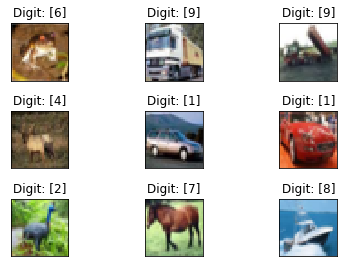

In [4]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], interpolation='none')
  plt.title("Digit: {}".format(Y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
from keras.models import Sequential

from keras.layers import Dense, Conv2D, Flatten, MaxPool2D

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding="same"))
model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
__________

In [8]:
history = model.fit(X_train, y_train_cat, batch_size=128,
            epochs=10, verbose=1, validation_split=0.3)

Instructions for updating:
Use tf.cast instead.
Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 13s 376us/step - loss: 2.4556 - acc: 0.3613 - val_loss: 1.3629 - val_acc: 0.5142
Epoch 2/10
35000/35000 [==============================] - 11s 310us/step - loss: 1.1945 - acc: 0.5715 - val_loss: 1.1073 - val_acc: 0.6057
Epoch 3/10
35000/35000 [==============================] - 11s 310us/step - loss: 0.9861 - acc: 0.6502 - val_loss: 0.9523 - val_acc: 0.6658
Epoch 4/10
35000/35000 [==============================] - 11s 309us/step - loss: 0.8625 - acc: 0.6960 - val_loss: 0.9045 - val_acc: 0.6949
Epoch 5/10
35000/35000 [==============================] - 11s 311us/step - loss: 0.7519 - acc: 0.7345 - val_loss: 0.9446 - val_acc: 0.6753
Epoch 6/10
35000/35000 [==============================] - 11s 310us/step - loss: 0.6647 - acc: 0.7655 - val_loss: 0.8618 - val_acc: 0.7117
Epoch 7/10
35000/35000 [==============================] - 11s 312us/

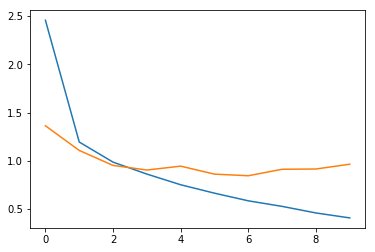

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

The validation loss curve is flattening out which means the model is overfitting on the training set. I rerun the model using dropout. 

In [0]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding="same"))


model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))



model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))




model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [33]:
history1 = model.fit(X_train, y_train_cat, batch_size=128,
            epochs=10, verbose=1, validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 14s 402us/step - loss: 2.7252 - acc: 0.2965 - val_loss: 1.6143 - val_acc: 0.3931
Epoch 2/10
35000/35000 [==============================] - 12s 344us/step - loss: 1.3744 - acc: 0.4968 - val_loss: 1.3228 - val_acc: 0.5389
Epoch 3/10
35000/35000 [==============================] - 12s 346us/step - loss: 1.1624 - acc: 0.5849 - val_loss: 1.0568 - val_acc: 0.6248
Epoch 4/10
35000/35000 [==============================] - 12s 344us/step - loss: 1.0181 - acc: 0.6386 - val_loss: 0.9969 - val_acc: 0.6399
Epoch 5/10
35000/35000 [==============================] - 12s 343us/step - loss: 0.9328 - acc: 0.6704 - val_loss: 1.0066 - val_acc: 0.6457
Epoch 6/10
35000/35000 [==============================] - 12s 343us/step - loss: 0.8638 - acc: 0.6941 - val_loss: 0.8952 - val_acc: 0.6880
Epoch 7/10
35000/35000 [==============================] - 12s 343us/step - loss: 0.8093 - acc: 0.7137 - val_loss: 0.

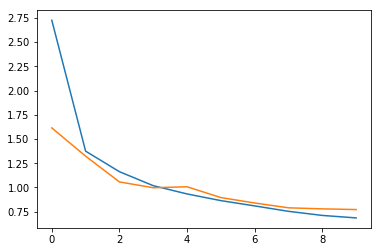

In [34]:
import matplotlib.pyplot as plt
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.show()

In [35]:
model.evaluate(X_test, y_test_cat, batch_size=128)

10000/10000 [==============================] - 1s 114us/step


[0.7812948572158813, 0.7372]

**The first number in the output is the value of the cross-entropy loss, the second is the value of the accuracy. For this model, it's approximately 74%! **